In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lint_analysis.bin_counts.models import BinCount

In [16]:
import numpy as np

def plot_series(token, y1=None, y2=None):
    
    series = BinCount.token_series(token, year1=y1, year2=y2)
    
    plt.figure(figsize=(20, 10))
    plt.bar(np.arange(len(series)), series / series.sum())

    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

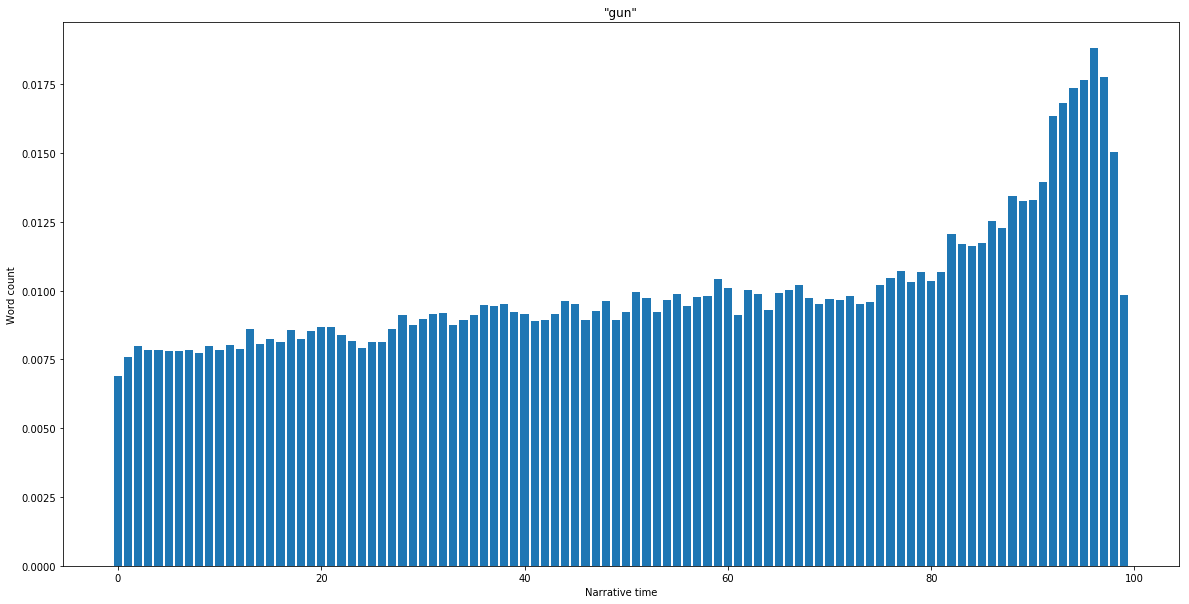

In [28]:
plot_series('gun')

In [87]:
import numpy as np

from scipy import stats

def token_chisquare(token):
    
    series = BinCount.token_series(token)
    
    expected = np.full(len(series), series.sum() / len(series))
    
    return stats.chisquare(series, expected)

In [92]:
token_chisquare('a')

Power_divergenceResult(statistic=83315.424512732279, pvalue=0.0)

In [6]:
from joblib import Memory

mem = Memory('cache')

token_counts = mem.cache(BinCount.token_counts)

tokens = token_counts(10000)

________________________________________________________________________________
[Memory] Calling lint_analysis.bin_counts.models.token_counts...
token_counts(10000)
__________________________________________________token_counts - 803.1s, 13.4min


In [7]:
data = []
for token, count in list(tokens.items())[:1000]:
    chi, p = token_chisquare(token)
    data.append((token, count, chi, p))

In [8]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'chi', 'p'))

df.sort_values('chi', ascending=False, inplace=True)

In [9]:
pd.set_option('display.max_rows', 1000)

df.head(100)

,token,count,chi,p
446,chapter,452057,136700.921457,0.0
7,”,34933931,101300.818804,0.0
15,you,20487595,96863.255295,0.0
6,a,44510387,83315.424513,0.0
5,of,50833243,81168.949273,0.0
2,the,111130017,78820.650937,0.0
8,i,32574587,76599.976262,0.0
1,.,115472128,56904.238443,0.0
23,?,12766593,50347.668391,0.0
19,“,16921467,49126.156959,0.0
